In [1]:
# random

In [4]:
!pip install networkx numpy matplotlib


  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 30.5 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.2 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.6 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


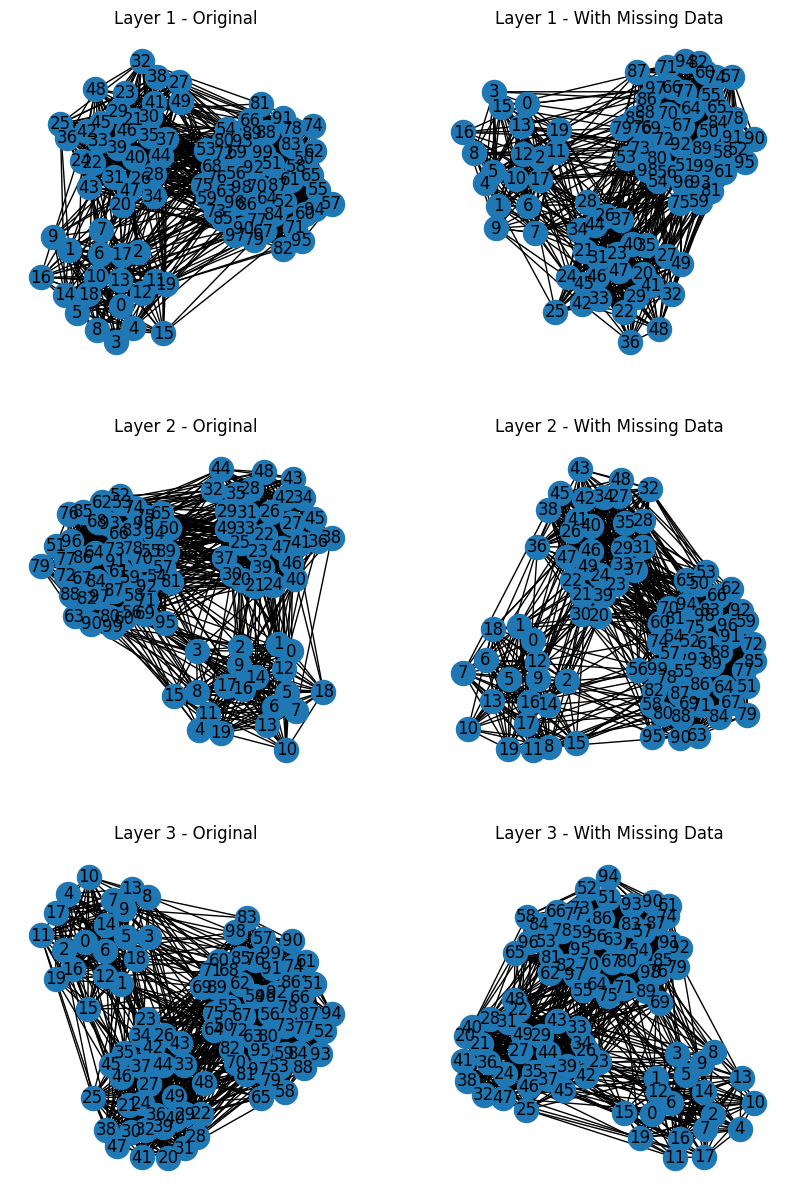

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def generate_sbm_graph(n, p, sizes):
    """
    Generate a graph based on Stochastic Block Model (SBM).
    
    :param n: Total number of nodes.
    :param p: A matrix of probabilities of connections between blocks.
    :param sizes: Sizes of each block.
    :return: A graph based on SBM.
    """
    return nx.stochastic_block_model(sizes, p)

def generate_multiplex_sbm(num_layers, n, p, sizes):
    """
    Generate a multiplex network using SBMs.
    
    :param num_layers: Number of layers in the multiplex network.
    :param n: Total number of nodes.
    :param p: A matrix of probabilities of connections between blocks.
    :param sizes: Sizes of each block.
    :return: A list of graphs representing the multiplex network.
    """
    return [generate_sbm_graph(n, p, sizes) for _ in range(num_layers)]

def simulate_missing_data(graph, missing_prob):
    """
    Simulate missing data by removing nodes with a given probability.
    
    :param graph: The input graph.
    :param missing_prob: Probability of a node being absent.
    :return: A graph with missing data.
    """
    g = graph.copy()
    for node in list(g.nodes):
        if np.random.rand() < missing_prob:
            g.remove_node(node)
    return g

# Parameters
num_layers = 3
n = 100
sizes = [20, 30, 50]  # Sizes of communities
p = [[0.8, 0.1, 0.05], [0.1, 0.7, 0.1], [0.05, 0.1, 0.6]]  # Probabilities between communities
missing_prob = 0.1  # Probability of a vertex being absent in a graph

# Generate multiplex network
multiplex_network = generate_multiplex_sbm(num_layers, n, p, sizes)

# Simulate missing data for each layer
multiplex_network_with_missing_data = [simulate_missing_data(g, missing_prob) for g in multiplex_network]

# Plot the original and modified graphs
fig, axes = plt.subplots(num_layers, 2, figsize=(10, 5 * num_layers))

for i in range(num_layers):
    nx.draw(multiplex_network[i], ax=axes[i, 0], with_labels=True)
    axes[i, 0].set_title(f'Layer {i + 1} - Original')
    
    nx.draw(multiplex_network_with_missing_data[i], ax=axes[i, 1], with_labels=True)
    axes[i, 1].set_title(f'Layer {i + 1} - With Missing Data')

plt.show()
